<a href="https://colab.research.google.com/github/sohamroy19/BotVerse/blob/udacity/Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#init

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import zipfile
import pandas as pd
import os

%matplotlib inline

In [ ]:
from google.colab import files
data = zipfile.ZipFile('drive/MyDrive/records.zip', 'r')
data.extractall()
data.printdir()

Streaming output truncated to the last 5000 lines.
records/IMG/right_2021_04_02_14_53_39_228.jpg  2021-04-02 14:54:52        13255
records/IMG/right_2021_04_02_14_53_39_296.jpg  2021-04-02 14:54:52        13457
records/IMG/right_2021_04_02_14_53_39_362.jpg  2021-04-02 14:54:52        13440
records/IMG/right_2021_04_02_14_53_39_430.jpg  2021-04-02 14:54:52        13372
records/IMG/right_2021_04_02_14_53_39_499.jpg  2021-04-02 14:54:52        13312
records/IMG/right_2021_04_02_14_53_39_568.jpg  2021-04-02 14:54:52        13437
records/IMG/right_2021_04_02_14_53_39_639.jpg  2021-04-02 14:54:52        13417
records/IMG/right_2021_04_02_14_53_39_709.jpg  2021-04-02 14:54:52        13372
records/IMG/right_2021_04_02_14_53_39_780.jpg  2021-04-02 14:54:52        13364
records/IMG/right_2021_04_02_14_53_39_850.jpg  2021-04-02 14:54:52        13427
records/IMG/right_2021_04_02_14_53_39_921.jpg  2021-04-02 14:54:52        13417
records/IMG/right_2021_04_02_14_53_39_992.jpg  2021-04-02 14:54:52   

#main code

### augmentations

In [ ]:
# data augmentation

def random_flip(image):
    """
    Randomly flipt the image left <-> right, and adjust the steering angle.
    """
    image = cv2.flip(image, 1)
    return image


def random_translate(image, range_x, range_y):
    """
    Randomly shift the image virtially and horizontally (translation).
    """
    trans_x = range_x * (np.random.rand() - 0.5)
    trans_y = range_y * (np.random.rand() - 0.5)
    trans_m = np.float32([[1, 0, trans_x], [0, 1, trans_y]])
    height, width = image.shape[:2]
    image = cv2.warpAffine(image, trans_m, (width, height))
    return image


def random_shadow(image):
    """
    Generates and adds random shadow
    """
    # (x1, y1) and (x2, y2) forms a line
    # xm, ym gives all the locations of the image
    x1, y1 = 320 * np.random.rand(), 0
    x2, y2 = 320 * np.random.rand(), 160
    xm, ym = np.mgrid[0:160, 0:320]

    # mathematically speaking, we want to set 1 below the line and zero otherwise
    # Our coordinate is up side down.  So, the above the line: 
    # (ym-y1)/(xm-x1) > (y2-y1)/(x2-x1)
    # as x2 == x1 causes zero-division problem, we'll write it in the below form:
    # (ym-y1)*(x2-x1) - (y2-y1)*(xm-x1) > 0
    mask = np.zeros_like(image[:, :, 1])
    mask[(ym - y1) * (x2 - x1) - (y2 - y1) * (xm - x1) > 0] = 1

    # choose which side should have shadow and adjust saturation
    cond = mask == np.random.randint(2)
    s_ratio = np.random.uniform(low=0.2, high=0.5)

    # adjust Saturation in HLS(Hue, Light, Saturation)
    hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
    hls[:, :, 1][cond] = hls[:, :, 1][cond] * s_ratio
    return cv2.cvtColor(hls, cv2.COLOR_HLS2RGB)


def random_brightness(image):
    """
    Randomly adjust brightness of the image.
    """
    # HSV (Hue, Saturation, Value) is also called HSB ('B' for Brightness).
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    ratio = 1.0 + 0.4 * (np.random.rand() - 0.5)
    hsv[:,:,2] =  hsv[:,:,2] * ratio
    return cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)

###display

In [ ]:
data = pd.read_csv("records/log.csv")
img = data['center'].values[300]
del(data)

# keep one for arbitrary checking
img = cv2.imread(os.path.join("records/IMG", img))
def display(img):
  img = img[40:-16, :, :] # remove the sky and the car front
  img = cv2.resize(img, (200, 66), cv2.INTER_AREA)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.imshow(img)

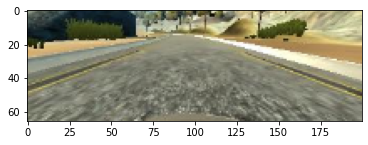

In [ ]:
display(img)

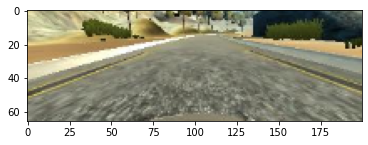

In [ ]:
display(random_flip(img))

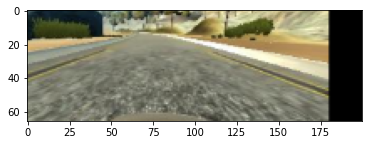

In [ ]:
display(random_translate(img, 100, 10))

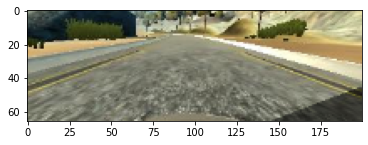

In [ ]:
display(random_shadow(img))

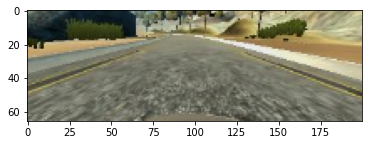

In [ ]:
display(random_brightness(img))